In [2]:
import pandas as pd

# Load the dataset
df_org = pd.read_csv("Language Detection.csv")

df_org.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
# Define the languages to keep
languages_to_keep = ["Malayalam", "Hindi", "Tamil", "Kannada"]
# Filter the dataset
df = df_org[df_org["Language"].isin(languages_to_keep)]
# Save the filtered dataset
df.to_csv("filtered_dataset.csv", index=False)
# Display the first few rows
print(df.head())

                                                   Text   Language
1385  ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദ...  Malayalam
1386  ഭൗതികപ്രതിഭാസങ്ങളും ജീവനും പ്രകൃതിയുടെ ഘടകങ്ങള...  Malayalam
1387  മനുഷ്യനിർമിതമായ വസ്തുക്കളെ പ്രകൃതിയുടെ ഭാഗമായി...  Malayalam
1388  അവയെ കൃത്രിമം എന്ന് വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായ...  Malayalam
1389  പ്രകൃതി എന്ന പദം പ്രപഞ്ചത്തെയും അതിലെ സമസ്ത പ്...  Malayalam


In [4]:
import re
from nltk.tokenize import word_tokenize
import string
# Function to clean text
def clean_text(text, language):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize words
    #words = [word for word in words if word not in stopwords_dict.get(language, set())]  # Remove stopwords
    return "".join(words)

# Apply preprocessing
df["clean_text"] = df.apply(lambda row: clean_text(row["Text"], row["Language"]), axis=1)

# Save cleaned data
df.to_csv("cleaned_dataset.csv", index=False)
print(df.head())

                                                   Text   Language  \
1385  ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദ...  Malayalam   
1386  ഭൗതികപ്രതിഭാസങ്ങളും ജീവനും പ്രകൃതിയുടെ ഘടകങ്ങള...  Malayalam   
1387  മനുഷ്യനിർമിതമായ വസ്തുക്കളെ പ്രകൃതിയുടെ ഭാഗമായി...  Malayalam   
1388  അവയെ കൃത്രിമം എന്ന് വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായ...  Malayalam   
1389  പ്രകൃതി എന്ന പദം പ്രപഞ്ചത്തെയും അതിലെ സമസ്ത പ്...  Malayalam   

                                             clean_text  
1385  ഭൗതികപ്രപഞ്ചത്തെമൊത്തത്തിൽസൂചിപ്പിക്കുന്നപദമാണ...  
1386     ഭൗതികപ്രതിഭാസങ്ങളുംജീവനുംപ്രകൃതിയുടെഘടകങ്ങളാണ്  
1387  മനുഷ്യനിർമിതമായവസ്തുക്കളെപ്രകൃതിയുടെഭാഗമായികണക...  
1388  അവയെകൃത്രിമംഎന്ന്വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായസ്വ...  
1389  പ്രകൃതിഎന്നപദംപ്രപഞ്ചത്തെയുംഅതിലെസമസ്തപ്രതിഭാസ...  


C:\Users\Aspire_Lays\AppData\Local\Temp\ipykernel_6720\2635538700.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = df.apply(lambda row: clean_text(row["Text"], row["Language"]), axis=1)


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

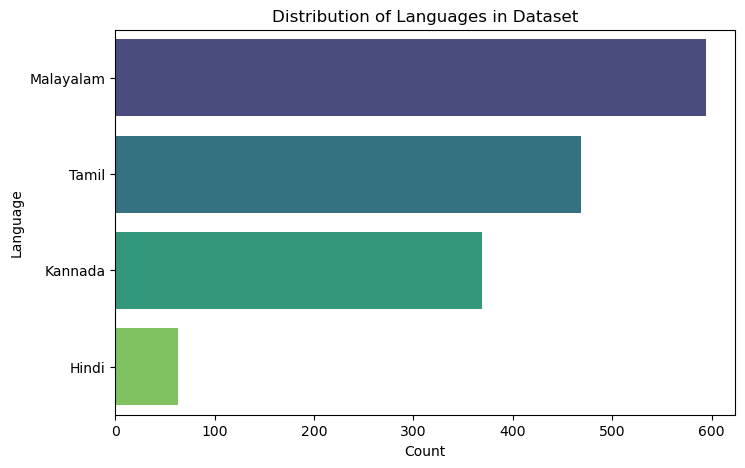

In [6]:
# Count distribution of languages
plt.figure(figsize=(8, 5))
sns.countplot(y=df["Language"], order=df["Language"].value_counts().index, palette="viridis")
plt.title("Distribution of Languages in Dataset")
plt.xlabel("Count")
plt.ylabel("Language")
plt.show()


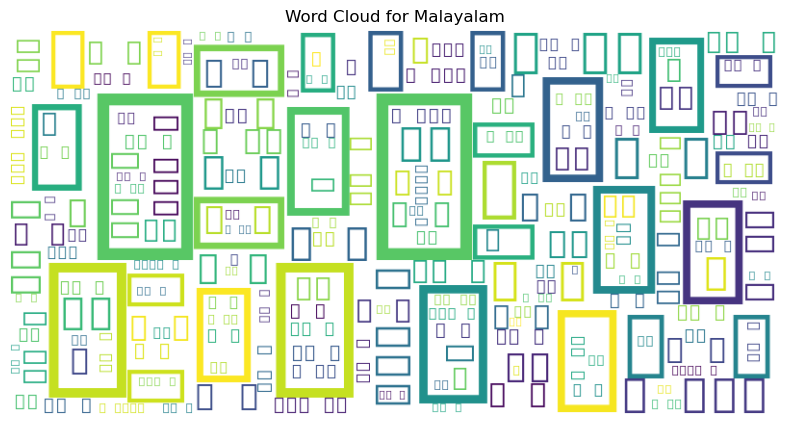

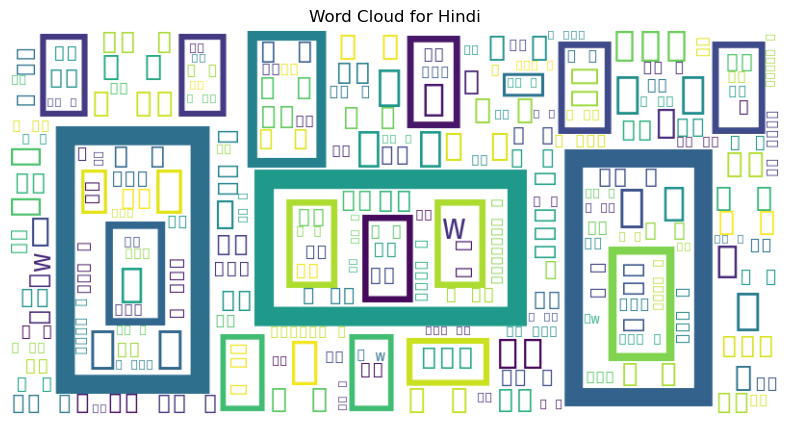

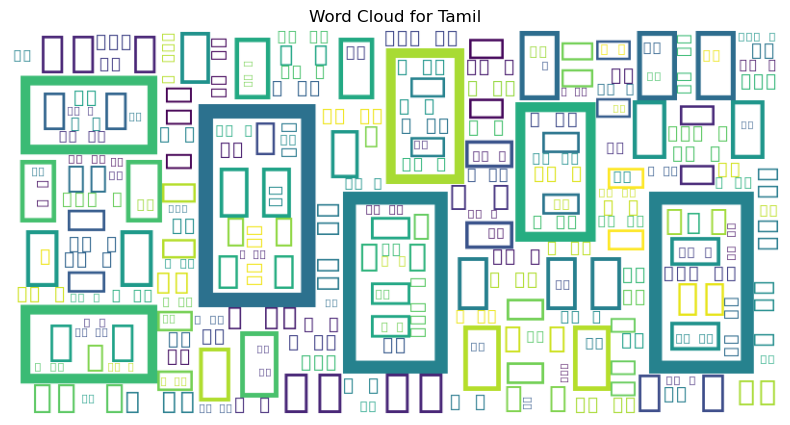

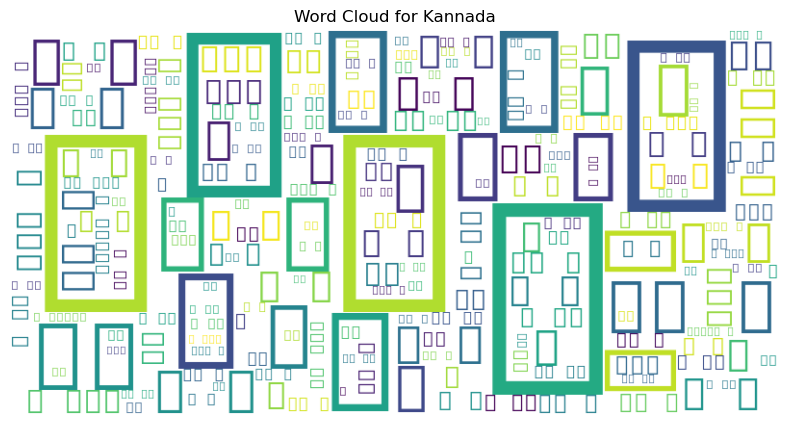

In [7]:
#word frequency analysis
from wordcloud import WordCloud

# Function to generate word cloud for each language
def generate_wordcloud(language):
    text = " ".join(df[df["Language"] == language]["clean_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {language}")
    plt.show()

# Generate word clouds for all languages
for lang in df["Language"].unique():
    generate_wordcloud(lang)


In [8]:
df = df.dropna(subset=["clean_text"])  # Drop NaN values
df["clean_text"] = df["clean_text"].astype(str)  # Ensure all text is string

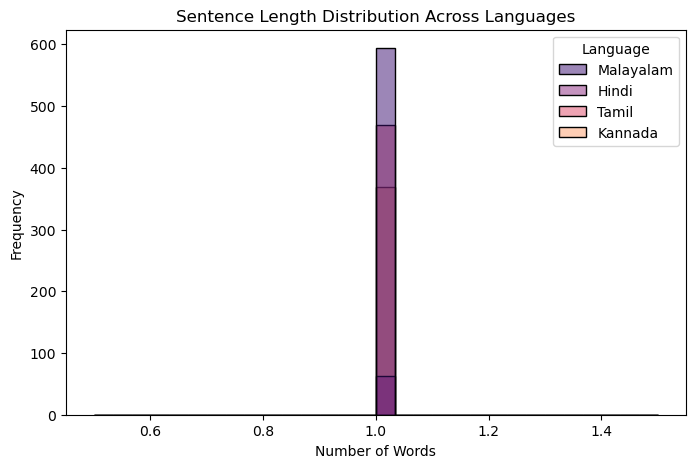

In [9]:
#sentence length distribution
# Compute sentence lengths
df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df, x="text_length", hue="Language", bins=30, kde=False, palette="magma")
plt.title("Sentence Length Distribution Across Languages")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF with character n-grams (captures subword patterns)
tfidf_vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(2, 4), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df["clean_text"])

print(f"TF-IDF Feature Shape: {X_tfidf.shape}")


TF-IDF Feature Shape: (1495, 5000)


In [11]:
#word n-grams
word_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_word_tfidf = word_tfidf_vectorizer.fit_transform(df["clean_text"])

In [12]:
df.head()

,Text,Language,clean_text,text_length
1385,ഭൗതികപ്രപഞ്ചത്തെ മൊത്തത്തിൽ സൂചിപ്പിക്കുന്ന പദ...,Malayalam,ഭൗതികപ്രപഞ്ചത്തെമൊത്തത്തിൽസൂചിപ്പിക്കുന്നപദമാണ...,1
1386,ഭൗതികപ്രതിഭാസങ്ങളും ജീവനും പ്രകൃതിയുടെ ഘടകങ്ങള...,Malayalam,ഭൗതികപ്രതിഭാസങ്ങളുംജീവനുംപ്രകൃതിയുടെഘടകങ്ങളാണ്,1
1387,മനുഷ്യനിർമിതമായ വസ്തുക്കളെ പ്രകൃതിയുടെ ഭാഗമായി...,Malayalam,മനുഷ്യനിർമിതമായവസ്തുക്കളെപ്രകൃതിയുടെഭാഗമായികണക...,1
1388,അവയെ കൃത്രിമം എന്ന് വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായ...,Malayalam,അവയെകൃത്രിമംഎന്ന്വിശേഷിപ്പിക്കുന്നുഅഭിപ്രായസ്വ...,1
1389,പ്രകൃതി എന്ന പദം പ്രപഞ്ചത്തെയും അതിലെ സമസ്ത പ്...,Malayalam,പ്രകൃതിഎന്നപദംപ്രപഞ്ചത്തെയുംഅതിലെസമസ്തപ്രതിഭാസ...,1


In [13]:
#word2vec
from gensim.models import Word2Vec

# Tokenize text for Word2Vec
df["tokenized_text"] = df["clean_text"].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(sentences=df["tokenized_text"], vector_size=100, window=5, min_count=2, workers=4)
w2v_model.save("word2vec_model.bin")

In [14]:
#check null
df.isna().any()

Text              False
Language          False
clean_text        False
text_length       False
tokenized_text    False
dtype: bool

In [15]:
from imblearn.over_sampling import SMOTE
y = df["Language"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

print(f"Original dataset size: {df.shape}")
print(f"Resampled dataset size: {X_resampled.shape}")


Original dataset size: (1495, 5)
Resampled dataset size: (2376, 5000)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["Language"])
df['label']

1385     2
1386     2
1387     2
1388     2
1389     2
        ..
10332    1
10333    1
10334    1
10335    1
10336    1
Name: label, Length: 1495, dtype: int32

In [36]:
label_encoder.classes_

array(['Hindi', 'Kannada', 'Malayalam', 'Tamil'], dtype=object)

In [35]:
df["Language"].unique()

array(['Malayalam', 'Hindi', 'Tamil', 'Kannada'], dtype=object)

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42)

In [19]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [26]:
X_test.shape

(299,)

In [21]:
# Train ML classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9698996655518395
              precision    recall  f1-score   support

       Hindi       1.00      0.93      0.96        14
     Kannada       0.90      1.00      0.95        79
   Malayalam       1.00      0.94      0.97       113
       Tamil       1.00      0.99      0.99        93

    accuracy                           0.97       299
   macro avg       0.97      0.96      0.97       299
weighted avg       0.97      0.97      0.97       299



<Axes: >

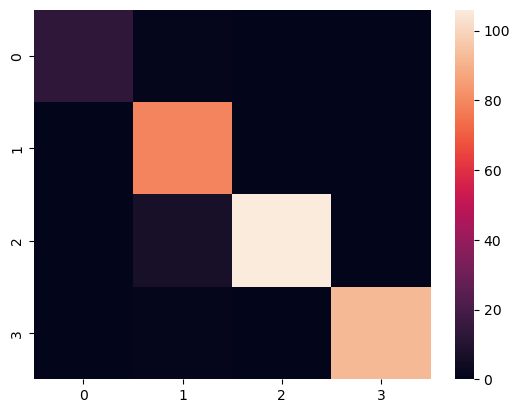

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred))

In [24]:
##Deep Learning

In [ ]:
sample_text = ["ದ್ರಾವಿಡ ಭಾಷೆಗಳಲ್ಲಿ"]

sample = vectorizer.transform(sample_text)

In [37]:
label_encoder.classes_

array(['Hindi', 'Kannada', 'Malayalam', 'Tamil'], dtype=object)

In [29]:
model.predict(sample)

array([2])